In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Bollinger Bands are a volatility-based indicator consisting of three lines: a moving average (middle band) and two outer bands set a number of standard deviations above and below it (typically 2).

When price approaches the upper band, the asset may be overbought; near the lower band, it may be oversold.

The bands expand during high volatility and contract when the market is calm, helping identify potential breakouts or reversals.

C:\Users\Ferna\AppData\Local\Temp\ipykernel_36152\2708793902.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,BB_SMA,STDV,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
1993-02-26,24.713392,24.730784,24.591651,24.730784,66200,24.639477,0.314566,25.268609,24.010344,NaN,NaN,NaN
1993-03-01,24.643814,24.800338,24.609031,24.800338,66500,24.649042,0.311475,25.271993,24.026091,0.0,-0.002815,0.000000
1993-03-02,25.009064,25.009064,24.626449,24.661233,182400,24.668174,0.321600,25.311374,24.024974,0.0,0.011964,0.000000
1993-03-03,25.113384,25.130776,25.009035,25.043818,280100,24.689913,0.336683,25.363279,24.016546,0.0,0.016185,0.000000
1993-03-04,24.974268,25.148183,24.974268,25.148183,89500,24.691652,0.338127,25.367907,24.015398,0.0,0.010556,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,603.750000,603.750000,599.520020,600.010010,64129000,593.026501,6.672066,606.370633,579.682369,0.0,23.430074,1.922182
2025-06-13,597.000000,601.849976,595.479980,598.500000,89506000,593.353500,6.699867,606.753234,579.953766,0.0,23.156943,1.922182
2025-06-16,602.679993,604.450012,600.219971,600.400024,79984100,593.777499,7.017075,607.811650,579.743349,0.0,23.386777,1.922182


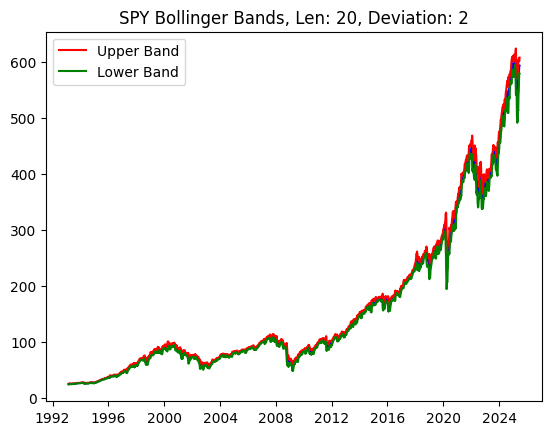

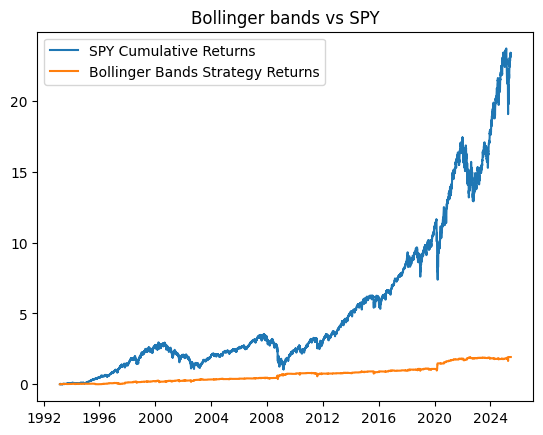

In [32]:
TICKER = 'SPY' 
BB_LEN = 20
DEV = 2
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0) # Get rid of multi-index

    return df.iloc[-LOOKBACK:,:] #Take a piece of the last "LOOKBACK" rows

def add_bollinger_bands(df, ticker = TICKER, dev = DEV, bb_len = BB_LEN):

    # can use ema
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['STDV'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (dev * df['STDV'])
    df['Lower_Band'] = df['BB_SMA'] - (dev * df['STDV'])

    df = df.dropna()

    plt.plot(df['BB_SMA'], color = 'blue')
    plt.plot(df['Upper_Band'], color = 'red', label='Upper Band')
    plt.plot(df['Lower_Band'], color = 'green', label='Lower Band')
    plt.title(f'{ticker} Bollinger Bands, Len: {bb_len}, Deviation: {dev}')
    plt.legend()

    return df

def add_strategy(df):

    df['Strategy'] = 0
    df['Strategy'] = np.where(df['Close'] > df['Upper_Band'], -1, np.where(df['Close'] < df['Lower_Band'], 1, 0))
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df

def test_strategy(df, ticker = TICKER):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure() # Make sure we can see our second plot
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', 'Bollinger Bands Strategy Returns'])
    plt.title(f'Bollinger bands vs {ticker}')

    return df

def main():

    df = get_data()
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df
